In [85]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

# Tarea 3: Encuentre la regresión

Ud recibe unos datos $x$ y $y$ cómo se muestran a continuación. Ud debe responder cuatro preguntas a partir de estos datos. Suponga que ud tiene un modelo tal que $y=f(x)$ más aún desconoce $f$.

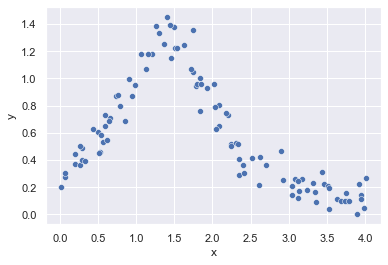

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [86]:
df = pd.read_pickle('ex1.gz')
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df

## (A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?

In [87]:
datos = df[(df.x >= 0) & (df.x <= 1.5)]

xAjuste = datos['x'].values.reshape(-1,1)
yAjuste = datos['y'].values.reshape(-1,1)

ajuste = LinearRegression()
ajuste.fit(xAjuste, yAjuste)

print("La Pendiente es: ", ajuste.coef_)
print("El Intercepto en el eje y es: ", ajuste.intercept_)
print("El R^2 es: ", ajuste.score(xAjuste,yAjuste))

La Pendiente es:  [[0.81638696]]
El Intercepto en el eje y es:  [0.18270691]
El R^2 es:  0.9316416262309236


## (B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial,
$$y=\beta_1+\beta_2x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$
Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores

In [88]:
def costo(x,A,b):
    r,c = A.shape
    X = np.matrix(x).T
    B = (A*X-b)
    return (B.T*B)[0,0]/r

In [89]:
y = df.loc[:, ['y']]
x = df.loc[:, ['x']].rename(columns={'x': 'x1'})
x.insert(0, 'x0', 1)

x['x2'] = x['x1'] * x['x1']
x['x3'] = x['x2'] * x['x1']
x['x4'] = x['x3'] * x['x1']
x['x5'] = x['x4'] * x['x1']

Xn = x.to_numpy()
Yn = y.to_numpy()

ajuste = sp.optimize.minimize(fun = costo, x0 = np.zeros(Xn.shape[1]), args = (Xn, Yn), tol = 1e-10)

print("Los Coeficientes son: ", ajuste['x'])
print("f(0): ", ajuste['x'][0])

print("El valor del primer coeficiente 𝛽1 y el valor cuando f(0) son muy similares, es decir que nuestro modelo funciona correctamente. Estos son iguales debido a que al X ser 0, todos los demás terminos se cancelan y solo queda el primer termino 𝛽1.")

Los Coeficientes son:  [ 0.35735971 -0.8426159   3.78480818 -3.00340067  0.85844837 -0.08305852]
f(0):  0.3573597119120869
El valor del primer coeficiente 𝛽1 y el valor cuando f(0) son muy similares, es decir que nuestro modelo funciona correctamente. Estos son iguales debido a que al X ser 0, todos los demás terminos se cancelan y solo queda el primer termino 𝛽1.


In [90]:
y2 = df["y"]
c = np.linspace(0,4,100)

def r(a,b,c,d,e,f,x):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

valor = r(ajuste['x'][5],ajuste['x'][4],ajuste['x'][3],ajuste['x'][2],ajuste['x'][1],ajuste['x'][0],c)

rcuadr = 1-np.sum((valor-y2)**2)/np.sum((y2-y2.mean())**2)
print("El R^2 es: ", rcuadr)


El R^2 es:  0.9111078051016539


## (C) Regresión polinomial exacta
Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección **(B)**.

Calcule $f(0)$ y compare con los resultados anteriores.

> Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a *Fourier*!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [91]:
y = df.loc[:, ['y']]
x = df.loc[:, ['x']].rename(columns={'x': 'x1'})

x.insert(0, 'x0', 1)
x['x2'] = x['x1'] * x['x1']
x['x3'] = x['x2'] * x['x1']
x['x4'] = x['x3'] * x['x1']
x['x5'] = x['x4'] * x['x1']

Xn = x.to_numpy()
Yn = y.to_numpy()

poli = np.linalg.inv(Xn.T @ Xn) @ Xn.T @ Yn
b0, b1, b2, b3, b4, b5 = poli

coeficientes = str(b0) +','+ str(b1) + ',' + str(b2) + ',' + str(b3) + ',' + str(b4) + ',' + str(b5)
print("Los coeficientes son: ", coeficientes)
print("f(0): ", poli[0])

print("Estos resultados comparados con los anteriores son muy similares, hay pequeños cambios despues de 3-4 decimales, sin embargo al aproximar terminan siendo iguales")

Los coeficientes son:  [0.35644669],[-0.83588269],[3.77276401],[-2.99526012],[0.85614705],[-0.08282854]
f(0):  [0.35644669]
Estos resultados comparados con los anteriores son muy similares, hay pequeños cambios despues de 3-4 decimales, sin embargo al aproximar terminan siendo iguales


## (D) Regresión a un modelo teórico

Suponga que su modelo teórico es el siguiente:
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores

In [92]:
def funcion(p,x):
    return (p[0])/((x-p[1])**2 + p[2])**p[3]
def reg(p,x,y):
    Y = funcion(p,x) - y
    return np.dot(Y,Y)/len(y)

In [96]:
x2 = df["x"]
regresion = sp.optimize.minimize(fun = reg, x0=np.array([0,0,1,0]), args = (x2,y2), method='L-BFGS-B', tol = 1e-8)
print("a, b, c, 𝛾 son: ",regresion['x'])
print("f(0): ", funcion(ajuste.x,0))

El valor de a,b,c y omega es respectivamente: [0.68739888 1.39239105 0.49564803 0.936637  ]
El valor de f(0) es: 32.618139111490365


In [94]:
print("Este metodo es el más impreciso respecto a los demas, se observa una significanete diferencia respecto a los demas metodos en el valor de f(0).")

Este metodo es el más impreciso respecto a los demas, se observa una significanete diferencia respecto a los demas metodos en el valor de f(0).
